# Genetic Algorithms

Demo of implementing a basic genetic algorithm.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [20]:
# Declare parameters

# Number of individuals in solution population.
pop_size = 100

# How many parameters in an individual.
individual_length = 100

# Probability that each specific parameter changes in an individual.
p_mutation = 0.25/individual_length

# Top Percentage of population to keep (most fit), so 0.25 = Only keep the top 25% fittest individuals of population.
selection_strength = 0.25

# Number of generations.
generations = 200

# Plot solution every N generations.
visualize_solution = 25

## Declare the optimal solution (truth)

Normally, we don't know the optimal solution, but we have some way of determining the fitness of the individual.

For us, the fitness will be the MSE difference of the individuals and the truth.

In [7]:
# Setup some plotting parameters
max_x = 2 * np.pi
x_range = np.arange(0, pop_size)

y_limits = [-1.5, 1.5]

# Setup the optimal y-value as some sin-function.
truth = np.sin(max_x*x_range/pop_size)

In [8]:
len(x_range)

100

In [5]:
# Declare a plotting function
def plot_example(individual, truth, max_x, y_limits):
    pop_size = len(individual)
    x_values = np.arange(0, pop_size)/pop_size
    
    # Calculate mean sq error for title
    mse = np.mean([(a-b)**2 for a, b in zip(individual, truth)])
    title_message = 'Best Fit, MSE: {0:.2f}'.format(mse)

    plt.plot(x_values, truth)
    plt.plot(x_values, individual)
    plt.ylim(y_limits[0], y_limits[1])
    plt.title(title_message)
    plt.grid()
    plt.show()

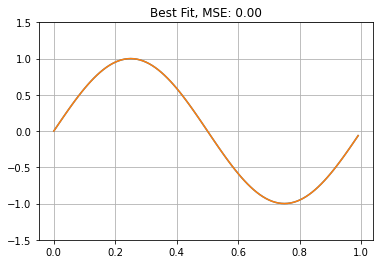

In [6]:
plot_example(truth, truth, max_x, y_limits)

### Pick a random solution and evaluate it.

In [9]:
rando_solution = np.random.uniform(low=-1.0, high=1.0, size=individual_length)

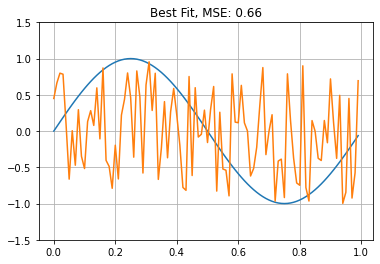

In [10]:
# Plot random solution
plot_example(rando_solution, truth, max_x, y_limits)

## Setup Population Functions

1. Population Initialization

2. Fitness Evaluation

3. Selection

4. Recombination

5. Mutation



## Population Initialization

In [11]:
# Population initialization:

def initialize_pop(pop_size, individual_length):
    """
    Description: Return a randomly initialized population.
    Args:
     -pop_size
     -individual_length
    Return: numpy array. Array of N-popuation vectors, each of length 'individual_length', N=pop_size.
    """
    population = np.random.uniform(low=-1.0, high=1.0, size=(pop_size, individual_length))

    return population

In [12]:
population = initialize_pop(pop_size, individual_length)

In [13]:
print(population.shape)

(100, 100)


In [14]:
population[0:2, 0:5]

array([[-0.92785974, -0.65986247,  0.03707067, -0.23219334, -0.60932365],
       [-0.04650915, -0.44827939, -0.22646609, -0.44026181,  0.06543248]])

## Fitness Evaluation

In [15]:
# Fitness Evaluation

def get_individual_fitness(individual, truth):
    """
    Description: Evaluate an individual solution fitness. We use MSE here, lower the better.
    Args:
     - individual: np.array, size (1 x individual_length), sames size as 'truth'
     - truth: see above.
    Return: MSE, number.
    """
    mse = np.mean([(a-b)**2 for a, b in zip(individual, truth)])
    return mse

## Selection Function

In [16]:
# Selection Function

def selection(population, pop_fitness, selection_strength):
    """
    Description: Perform Selection on Population- return a subpopulation of the highest fit population.
    Args:
     - population: np.array, size (pop_size x individual_length).
     - pop_fitness: np.array. Array of fitness values corresponding to each individual in prior population.
     - selection_strength. Float. 0<x<1, % of top individuals to keep. Lower is more restrictive.
    Return: np.array. size ( floor(selection_strength * population) x individual_length )
    """
    # Figure out how many to save:
    num_to_save = int(np.floor(selection_strength * population.shape[0]))
    
    # Get indices of N top fit individuals (smallest MSE is best)
    individuals_to_save = pop_fitness.argsort()[:num_to_save]
    # For maximizing fitness:
    # individuals_to_save = pop_fitness.argsort()[-num_to_save:][::-1]
    
    # Save top fit parent population
    parents = population[individuals_to_save, :]
    
    return parents

## Recombination Function

In [17]:
# Recombination Function

def recombination(parent_pop, pop_size):
    """
    Description: Recombine parents to create new children solutions.
    Args:
     - parent_pop: np.array, size (parent_size x individual_length).
     - pop_size: Integer. Total population to make up
    Return: np.array. size ( pop_size x individual_length )
    """
    # Figure out how many children to create
    num_children = pop_size - parent_pop.shape[0]
    
    # Initialize Children
    children = np.zeros(shape=(num_children, parent_pop.shape[1]))
    
    # Loop and create each child
    for c in range(num_children):
        # Randomly get two parents
        parents = parent_pop[np.random.randint(0,parent_pop.shape[0],2)]
        
        # Select a random crossover location
        crossover_pt = np.random.randint(1, high=(parent_pop.shape[1] - 1))
        
        # Create child
        children[c, :crossover_pt] = parents[0, :crossover_pt]
        children[c, crossover_pt:] = parents[1, crossover_pt:]
        
    return children

## Mutation Function

In [18]:
# Mutation Function

def mutation(individual, p_mutation):
    """
    Description: Mutate Child Population.
    Args:
     - individual: np.array, size (1 x individual_length).
     - p_mutation: Float. 0<x<1. Probability of mutation of each sub-parameter of a single individual.
    Return: np.array. size ( 1 x individual_length )
    """
    # Generate a probability vector, same size as individual using the uniform distribution.
    prob_vector = np.random.uniform(low=0.0, high=1.0, size=individual_length)
    
    # Find where to mutate individual
    ix_to_mutate = np.argwhere(prob_vector < p_mutation)
    
    # Mutate individual
    if ix_to_mutate.size > 0:
        new_vals = np.random.uniform(low=-1.0, high=1.0, size=ix_to_mutate.shape)
        individual[ix_to_mutate] = new_vals
        
    return individual

## Start Genetic Algorithm

Starting generation 25 out of 200


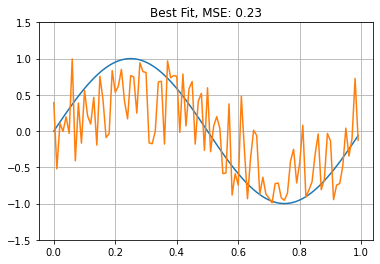

Starting generation 50 out of 200


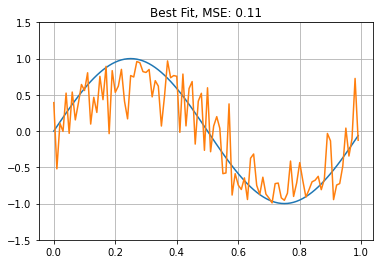

Starting generation 75 out of 200


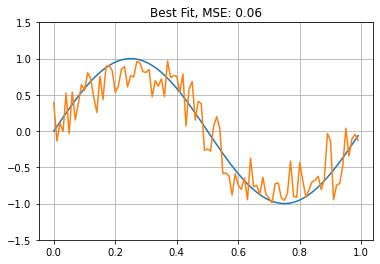

Starting generation 100 out of 200


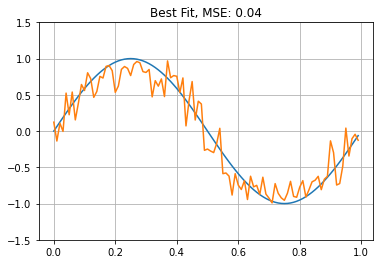

Starting generation 125 out of 200


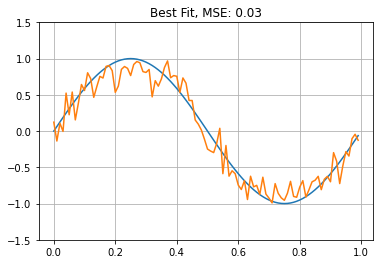

Starting generation 150 out of 200


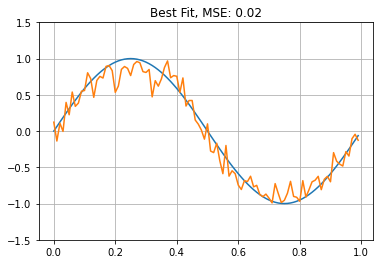

Starting generation 175 out of 200


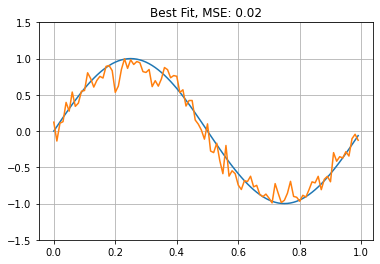

Starting generation 200 out of 200


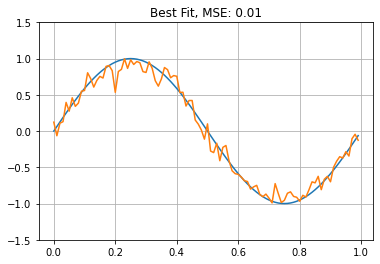

In [21]:
best_fitness_sequence = []

for g in range(generations):
    if (g + 1) % visualize_solution == 0:
        print('Starting generation {:,} out of {:,}'.format(g + 1, generations))
    
    # Get fitness of population
    pop_fitness = np.apply_along_axis(get_individual_fitness, 1, population, truth)
    
    # Save best fitness
    best_fitness = np.min(pop_fitness)
    best_ix = np.argmin(pop_fitness)
    best_fitness_sequence.append(best_fitness)
    
    # Check to plot
    if (g + 1) % visualize_solution == 0:
        plot_example(population[best_ix, :], truth, max_x, y_limits)
    
    # Get parents
    parents = selection(population, pop_fitness, selection_strength)
    
    # Create children from parents
    children = recombination(parents, pop_size)
    
    # Mutate children
    children = np.apply_along_axis(mutation, 1, children, p_mutation)
    
    # Combine parents and children
    population = np.concatenate((parents, children), axis=0)

In [22]:
best_ix = np.argmin(pop_fitness)

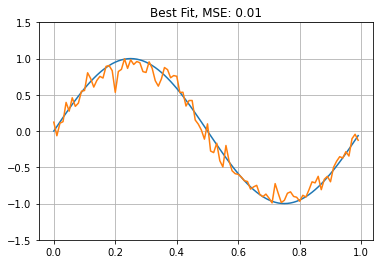

In [23]:
plot_example(population[best_ix, :], truth, max_x, y_limits)

## Plot Fitness over time

Text(0.5, 1.0, 'MSE vs Generations')

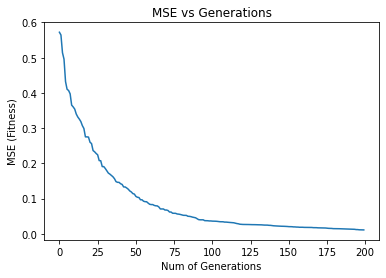

In [24]:
g_seq = np.arange(len(best_fitness_sequence))

plt.plot(g_seq, np.array(best_fitness_sequence))
plt.xlabel('Num of Generations')
plt.ylabel('MSE (Fitness)')
plt.title('MSE vs Generations')